## Alejo Vinluan (abv210001)

# Text Classification 2

This Jupyter notebook will attempt to classify whether or not a text message is spam or not.

## Dataset

The dataset is comprised only of 2 columns: Category and Message. The Category column has 2 values: ham and spam. Ham implies that the message is real and Spam implies that the message is spam. The Message column are the features.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/spam_messages.csv')
# Source: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

x_axis = data['Message']
y_axis = data['Category']

## Data Distribution

The following bar chart will display how many rows in the dataset are real messages in comparison to fake messages.

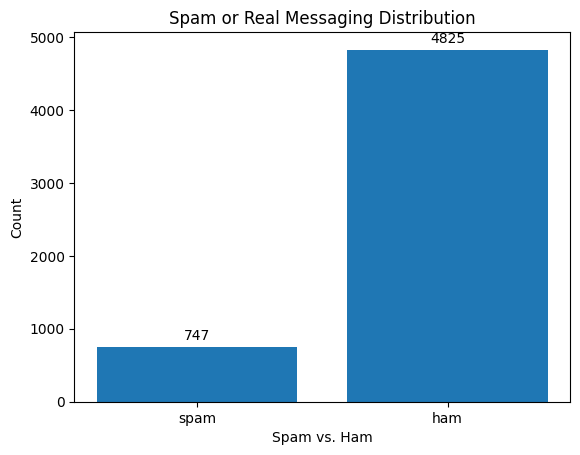

In [3]:
import matplotlib.pyplot as plt

# Create a counter of each of the labels
value_counter = {}

for label in data['Category']:
    if label not in value_counter:
        value_counter[label] = 1
    else:
        value_counter[label] += 1
        
# Create a bar graph of each of the counts
figure, bar_graph = plt.subplots()
bars = bar_graph.bar(['spam', 'ham'], [value_counter['spam'], value_counter['ham']])
bar_graph.set_xlabel('Spam vs. Ham')
bar_graph.set_ylabel('Count')
bar_graph.set_title('Spam or Real Messaging Distribution')

# Create the labels above the bar graphs
for bar in bars:
    height = bar.get_height()
    bar_graph.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

There is significantly more real messages in the dataset than spam messages. This may cause the models to lean towards labeling more rows as positive.

## Data Preprocessing

The data needs to be processed before it can be fit into the model. The following steps will be taken:

1. Find the dimension of the data by finding unique words

2. Tokenize the data

3. Make each of the sequences the same length

4. Convert the labels into a categorical array


The dimension of the array is used to find how many unique words there are within the text, this can be used once the dataset is Tokenized.

In [4]:
# Find the dimensions of the data
unique_words = set()
for row in data['Message']:
    for word in row.split(" "):
        unique_words.add(word)
dimension = len(unique_words)
print("Number of unique words:", dimension)


Number of unique words: 15688


In [5]:
# Tokenize the data
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=dimension)
tokenizer.fit_on_texts(x_axis)
sequences = tokenizer.texts_to_sequences(x_axis)

Each of the sequences must be padded so that they are all the same length. In this way, all of the sequences will have the same shape for the model.

In [6]:
# Make each of the sequences the same length
from keras.utils import pad_sequences

max_length = max(len(seq) for seq in sequences)
x_axis = pad_sequences(sequences, maxlen=max_length)

In [7]:
# Convert the labels to categorical
from keras.utils import to_categorical

y_axis = [1 if label == 'ham' else 0 for label in y_axis]
y_axis = to_categorical(y_axis)

## Split into Train and Test

After the data has been processed, it can now be split into 80% train and 20% testing data.

In [8]:
data['Message'] = x_axis
data['Category'] = y_axis

# Split data into 80% train and 20% test
train, test = train_test_split(data, test_size=0.2, random_state=123)

# Split the train and test data into x-axis and y-axis
x_train = train['Message']
y_train = train['Category']

x_test = test['Message']
y_test = test['Category']

## Sequential Model

A sequential model is a model in Keras where each layer has one input tensor and one output tensor.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/20
9/9 [==============================] - 1s 25ms/step - loss: 0.6902 - accuracy: 0.8667 - val_loss: 0.6877 - val_accuracy: 0.8619
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.8667 - val_loss: 0.6840 - val_accuracy: 0.8619
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.8667 - val_loss: 0.6806 - val_accuracy: 0.8619
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.8667 - val_loss: 0.6774 - val_accuracy: 0.8619
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.8667 - val_loss: 0.6743 - val_accuracy: 0.8619
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.8667 - val_loss: 0.6712 - val_accuracy: 0.8619
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.8667 - val_loss: 0.6680 - val_accuracy: 0.8619
Epoch 8/20
9/9 [=================

In [10]:
results = model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 837us/step - loss: 0.6297 - accuracy: 0.8619


According to the results of the model, there is an 86.2% accuracy with a loss of 62.9%. This suggests that the model is relatively accurate but expereinces a higher error rate when the model incorrectly predicts a label.

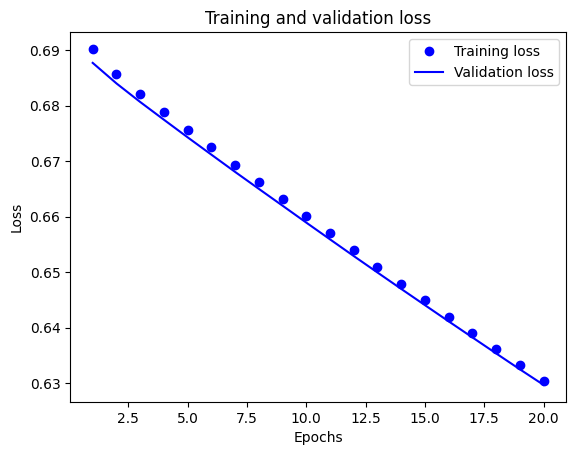

In [11]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

As more epochs were completed, the loss decreased significantly. This allowed the loss to end at 62.9%.

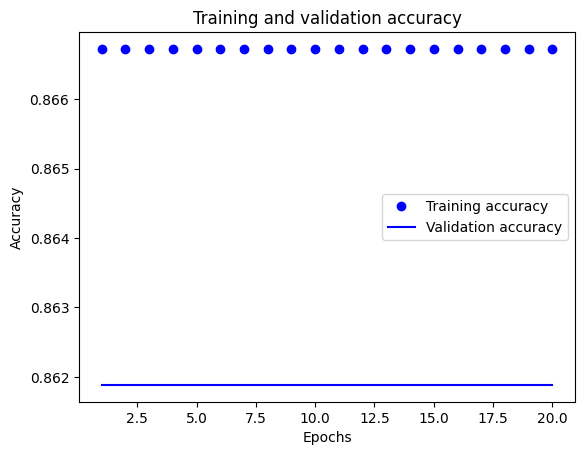

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The training and validation accuracies were relatively high and consistent throughout, despite more epochs.

## RNN Architecture

RNN are recurrent neural networks which uses sequential data to make predictions. They take information from prior epochs in order to make predictions on the future epochs rather than relying on purely the data. 

In [15]:
model = keras.Sequential([
    layers.Embedding(dimension, 32),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/20
9/9 [==============================] - 2s 36ms/step - loss: 0.6258 - accuracy: 0.8667 - val_loss: 0.5765 - val_accuracy: 0.8628
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 0.5451 - accuracy: 0.8667 - val_loss: 0.5109 - val_accuracy: 0.8628
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.4852 - accuracy: 0.8667 - val_loss: 0.4613 - val_accuracy: 0.8628
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 0.4411 - accuracy: 0.8667 - val_loss: 0.4270 - val_accuracy: 0.8628
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.4125 - accuracy: 0.8667 - val_loss: 0.4085 - val_accuracy: 0.8628
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 0.8667 - val_loss: 0.4019 - val_accuracy: 0.8628
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3937 - accuracy: 0.8667 - val_loss: 0.4001 - val_accuracy: 0.8628
Epoch 8/20
9/9 [=================

In [16]:
results = model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 902us/step - loss: 0.4006 - accuracy: 0.8628


According to the data, there is

* 86% accuracy

* 40% loss

when utilizing RNN's.

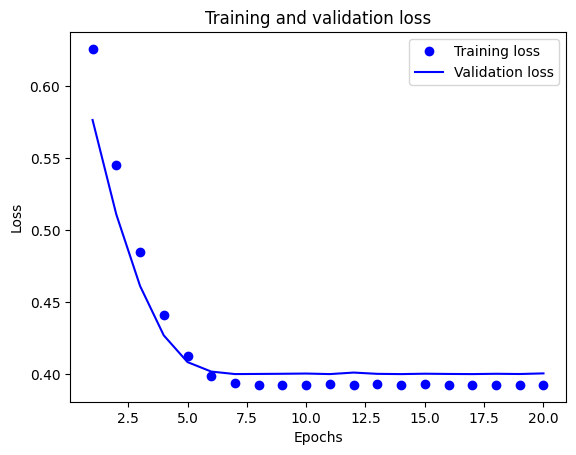

In [17]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

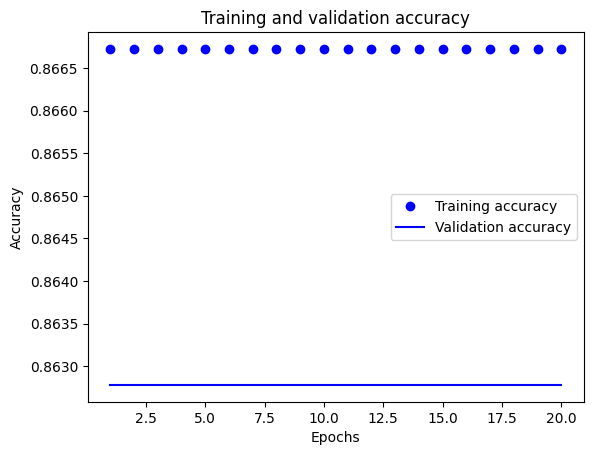

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## CNN Architecture

Convolutional Neural Networks are multi-layer neural networks. It considers multiple functions and can develop more functions from the original ones.

In [28]:
model = keras.Sequential([
    layers.Embedding(100000, dimension, input_length=max_length),
    layers.Conv1D(32, 7, activation='relu', padding='same'),
    layers.GlobalMaxPooling1D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/20
9/9 [==============================] - 56s 6s/step - loss: 0.4674 - accuracy: 0.8515 - val_loss: 0.4039 - val_accuracy: 0.8628
Epoch 2/20
9/9 [==============================] - 50s 5s/step - loss: 0.4114 - accuracy: 0.8665 - val_loss: 0.4004 - val_accuracy: 0.8628
Epoch 3/20
9/9 [==============================] - 46s 5s/step - loss: 0.4089 - accuracy: 0.8667 - val_loss: 0.4017 - val_accuracy: 0.8628
Epoch 4/20
9/9 [==============================] - 44s 5s/step - loss: 0.4084 - accuracy: 0.8667 - val_loss: 0.4052 - val_accuracy: 0.8628
Epoch 5/20
9/9 [==============================] - 43s 5s/step - loss: 0.4080 - accuracy: 0.8667 - val_loss: 0.4075 - val_accuracy: 0.8628
Epoch 6/20
9/9 [==============================] - 42s 5s/step - loss: 0.4031 - accuracy: 0.8667 - val_loss: 0.4032 - val_accuracy: 0.8628
Epoch 7/20
9/9 [==============================] - 42s 5s/step - loss: 0.4081 - accuracy: 0.8667 - val_loss: 0.4077 - val_accuracy: 0.8628
Epoch 8/20
9/9 [==================

In [31]:
results = model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8628


According to the data, there is

* 86% accuracy

* 40% loss

when utilizing CNN's.

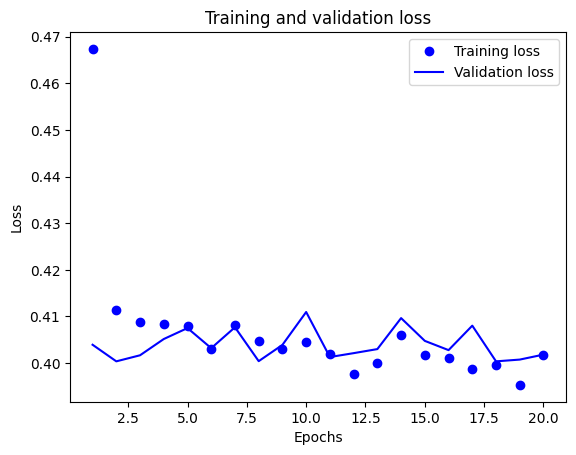

In [29]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

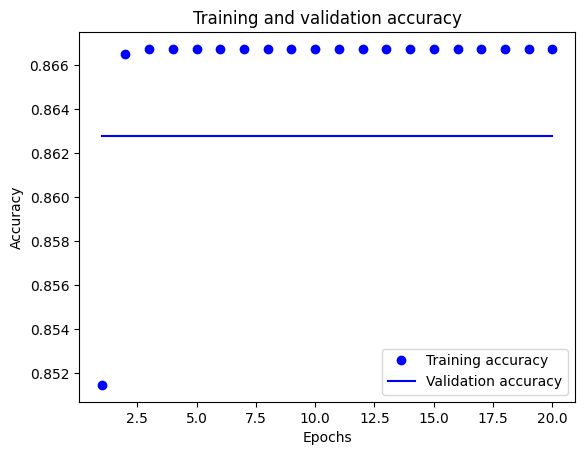

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Analysis

All 3 of the models had about the same accuracy at 82%. The Sequential model had a loss of 62.9% while the RNN and CNN models both have a loss of about 40%. The RNN model ran significantly faster at a 2.8 second runtime than the CNN's 14 minute runtime. The similar accuracy and loss in both models suggest that RNN is better to be utilzied on a text classification dataset since the runtime would be faster, especially when the dataset is massive.